In [90]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import sys; sys.path.append('/home/mitch/github/mexico_national_accounts/')

import filters

datadir = '/home/mitch/github/mexico_national_accounts/data/'
os.chdir(datadir)
plotdir = '/home/mitch/school/twoasset/plots/'

In [91]:
os.chdir(datadir + 'raw/')
df = pd.read_csv('data_real_sa_domesticcurrency.csv')
rename = {
    'Unnamed: 0' : 'country',
    'Unnamed: 1' : 'variable',
}
df = df.rename(columns=rename)
df.head(10)

,country,variable,Q1 1993,Q2 1993,Q3 1993,Q4 1993,Q1 1994,Q2 1994,Q3 1994,Q4 1994,...,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022
0,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"31,923.10","30,289.70","34,119.90","35,268.10","38,325.00","37,292.20","37,340.30","38,129.60","37,280.40","40,527.90"
1,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"156,211.10","163,799.80","169,338.40","167,878.10","173,911.20","178,083.00","179,692.90","181,142.20","183,669.90","180,841.30"
2,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"28,132.20","31,838.60","34,162.60","33,612.90","34,220.80","36,490.80","37,731.50","39,996.30","39,346.20","36,517.20"
3,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"32,900.10","37,417.60","38,426.50","40,642.40","41,792.70","45,776.00","48,784.90","50,062.30","50,521.60","46,190.50"
4,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"104,822.50","110,690.20","113,628.50","115,301.90","118,153.20","122,020.80","126,693.30","128,801.10","129,959.40","127,966.00"
5,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"115,902.45","119,822.12","122,595.59","126,659.48","129,908.70","130,821.11","137,782.38","140,234.19","140,206.11","143,784.76"
6,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"382,826.27","380,194.06","382,011.49","391,247.37","402,601.15","406,326.98","406,854.74","411,049.16","412,682.20","412,142.12"
7,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"74,286.06","74,738.88","77,655.63","80,426.36","82,961.18","85,378.68","88,306.48","89,246.07","89,416.68","91,175.76"
8,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"106,676.03","114,026.30","118,031.52","119,249.78","123,220.39","129,947.24","135,245.28","137,297.22","140,673.39","138,337.39"
9,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"227,971.85","221,227.58","216,782.33","226,181.21","235,396.00","236,565.32","233,939.98","239,000.03","244,202.10","240,282.57"


<Axes: xlabel='Y'>

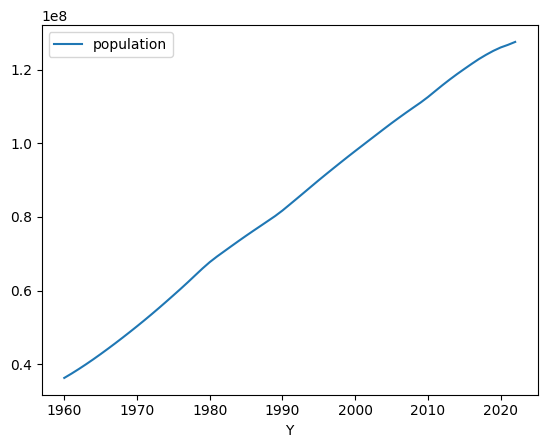

In [92]:
pop = pd.read_csv(datadir + '/raw/mexico_population.csv')
pop.columns = ['date', 'population']
pop['date'] = pd.to_datetime(pop['date'])
pop['Y'] = pop.date.dt.year

pop['log_population'] = np.log(pop['population'])
pop['log_population_tp1'] = pop['log_population'].shift(1)


pop = pop[['Y', 'population', 'log_population', 'log_population_tp1']]
pop.plot('Y', 'population')

In [93]:
# create year-quarter index for every quarter in the population dataframe
YQ = pd.DataFrame()
YQ['date'] = pd.date_range(str(pop.Y.min()),str(pop.Y.max()), freq='Q')
YQ['Y'] = YQ['date'].dt.year
YQ['Q'] = YQ['date'].dt.quarter
YQ = YQ.drop(columns='date')
YQ

,Y,Q
0,1960,1
1,1960,2
2,1960,3
3,1960,4
4,1961,1
...,...,...
243,2020,4
244,2021,1
245,2021,2
246,2021,3


In [94]:
pop = pop.merge(YQ, on='Y', how='outer')
pop['Qm1'] = pop['Q'] - 1
pop['log_population_interpolated'] = (
    pop['log_population']*(1 - pop['Qm1']/4) 
    + pop['log_population_tp1']*pop['Qm1']/4
    )
pop['population_interpolated'] = np.exp(pop['log_population_interpolated'])
pop = pop[['Y', 'Q', 'population_interpolated', 'log_population_interpolated']]
pop = pop.rename(columns={
    'population_interpolated':'population', 
    'log_population_interpolated':'log_population', 
    })
pop = pop.dropna()
pop['Q'] = pop['Q'].astype('int')
pop

,Y,Q,population,log_population
4,1961,1,3.743932e+07,17.438232
5,1961,2,3.714300e+07,17.430286
6,1961,3,3.684903e+07,17.422340
7,1961,4,3.655739e+07,17.414394
8,1962,1,3.868328e+07,17.470918
...,...,...,...,...
243,2020,4,1.253129e+08,18.646325
244,2021,1,1.267051e+08,18.657373
245,2021,2,1.265281e+08,18.655975
246,2021,3,1.263512e+08,18.654576


In [95]:
unique_names = df.variable.unique()
print(unique_names)


['National Accounts, Expenditure, Gross Domestic Product, Exports of Goods and Services, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, Gross Capital Formation, Gross Fixed Capital Formation, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, External Balance of Goods and Services, Imports of Goods and Services, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, Final Consumption Expenditure, Private Sector (Households and Non-profit Institutions Serving Households), Real, Seasonally Adjusted, Domestic Currency']


In [96]:
idExports = unique_names[['Exports' in name for name in unique_names]][0]
idCapital = unique_names[['Capital' in name for name in unique_names]][0]
idImports = unique_names[['Imports' in name for name in unique_names]][0]
idConsumption = unique_names[['Consumption' in name for name in unique_names]][0]
idGDP = unique_names[['Gross Domestic Product, Real' in name for name in unique_names]][0]

rename = {
    idExports:'Exports',
    idCapital:'Investment',
    idImports:'Imports',
    idConsumption:'Consumption',
    idGDP:'GDP'}
df['variable'] = df['variable'].map(rename)

In [97]:
df = df.query("country == 'Mexico'")
df

,country,variable,Q1 1993,Q2 1993,Q3 1993,Q4 1993,Q1 1994,Q2 1994,Q3 1994,Q4 1994,...,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022
10,Mexico,Exports,"357,560.80","367,273.20","373,421.60","389,414.60","397,014.20","396,298.70","405,280.90","420,269.00",...,"1,698,485.90","1,701,135.10","1,654,666.90","1,680,475.70","1,689,969.10","1,778,926.00","1,822,787.70","1,843,196.50","1,875,762.00","1,781,731.90"
11,Mexico,GDP,"2,516,478.50","2,523,185.10","2,548,959.80","2,582,673.90","2,609,049.20","2,663,879.10","2,684,423.00","2,715,658.30",...,"4,242,295.40","4,425,479.00","4,443,929.40","4,475,675.70","4,424,962.50","4,476,192.00","4,528,582.50","4,577,604.70","4,619,060.70","4,640,091.30"
12,Mexico,Investment,"518,833.30","520,778.80","532,107.20","572,297.80","605,161.00","623,780.90","624,178.80","605,683.20",...,"724,079.20","762,024.30","795,134.90","804,622.80","825,928.50","820,679.20","840,196.60","855,621.90","859,549.50","885,659.20"
13,Mexico,Imports,"372,632.00","391,449.30","395,695.00","418,023.30","444,393.50","457,645.60","471,688.80","483,256.60",...,"1,425,209.00","1,595,150.00","1,686,681.00","1,682,624.70","1,716,333.00","1,755,828.40","1,796,457.80","1,879,799.00","1,909,721.30","1,860,471.20"
14,Mexico,Consumption,"1,562,821.00","1,577,824.10","1,574,110.90","1,598,525.90","1,606,205.60","1,660,252.00","1,684,663.70","1,695,355.80",...,"2,759,598.60","2,918,849.20","2,965,984.70","3,006,894.80","3,010,283.60","3,082,032.10","3,171,733.10","3,199,451.70","3,207,898.50","3,224,893.90"


In [98]:
df = df.melt(id_vars=['country', 'variable'],
                var_name='Date',
                value_name='Value')
df = (df.pivot(index=['country', 'Date'], columns='variable', values='Value')
       .reset_index()
)
df['Date'] = df['Date'].astype('str')
df['country'] = df['country'].astype('str')
tofloat = ['Consumption', 'Exports', 'GDP', 'Imports', 'Investment']
for var in tofloat:
    df[var] = df[var].str.replace(',', '').astype('float64')
df

variable,country,Date,Consumption,Exports,GDP,Imports,Investment
0,Mexico,Q1 1993,1562821.0,357560.8,2516478.5,372632.0,518833.3
1,Mexico,Q1 1994,1606205.6,397014.2,2609049.2,444393.5,605161.0
2,Mexico,Q1 1995,1577205.7,445781.6,2559375.9,371907.5,420182.6
3,Mexico,Q1 1996,1596424.2,549934.9,2595954.5,429944.0,429340.7
4,Mexico,Q1 1997,1696862.4,590550.0,2759869.7,499551.3,500864.5
...,...,...,...,...,...,...,...
115,Mexico,Q4 2018,3112470.0,1700649.5,4636254.5,1752655.7,908301.9
116,Mexico,Q4 2019,3141116.2,1650100.2,4607595.5,1675217.2,870319.6
117,Mexico,Q4 2020,2918849.2,1701135.1,4425479.0,1595150.0,762024.3
118,Mexico,Q4 2021,3082032.1,1778926.0,4476192.0,1755828.4,820679.2


In [99]:
df['Q'] = [df[1:2] for df in df.Date]
df['Y'] = [df[-4:] for df in df.Date]
time = [Y + "-Q" + Q for Y, Q in zip(df.Y, df.Q)]
df['time'] = pd.to_datetime(time)
df['Y'] = df['Y'].astype('int')
df['Q'] = df['Q'].astype('int')
df = df.sort_values(by=['country', 'Y', 'Q'])
df

/tmp/ipykernel_50081/52423904.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(time)


variable,country,Date,Consumption,Exports,GDP,Imports,Investment,Q,Y,time
0,Mexico,Q1 1993,1562821.0,357560.8,2516478.5,372632.0,518833.3,1,1993,1993-01-01
30,Mexico,Q2 1993,1577824.1,367273.2,2523185.1,391449.3,520778.8,2,1993,1993-04-01
60,Mexico,Q3 1993,1574110.9,373421.6,2548959.8,395695.0,532107.2,3,1993,1993-07-01
90,Mexico,Q4 1993,1598525.9,389414.6,2582673.9,418023.3,572297.8,4,1993,1993-10-01
1,Mexico,Q1 1994,1606205.6,397014.2,2609049.2,444393.5,605161.0,1,1994,1994-01-01
...,...,...,...,...,...,...,...,...,...,...
118,Mexico,Q4 2021,3082032.1,1778926.0,4476192.0,1755828.4,820679.2,4,2021,2021-10-01
29,Mexico,Q1 2022,3171733.1,1822787.7,4528582.5,1796457.8,840196.6,1,2022,2022-01-01
59,Mexico,Q2 2022,3199451.7,1843196.5,4577604.7,1879799.0,855621.9,2,2022,2022-04-01
89,Mexico,Q3 2022,3207898.5,1875762.0,4619060.7,1909721.3,859549.5,3,2022,2022-07-01


In [100]:
rename = {
    'Consumption':'C',
    'Exports':'X',
    'Imports':'M',
    'Investment':'I'
}
df = df.rename(columns = rename)

In [101]:
df = df.merge(pop, how='inner', on=['Y', 'Q'])
df

,country,Date,C,X,GDP,M,I,Q,Y,time,population,log_population
0,Mexico,Q1 1993,1562821.0,357560.8,2516478.5,372632.0,518833.3,1,1993,1993-01-01,8.664845e+07,18.277370
1,Mexico,Q2 1993,1577824.1,367273.2,2523185.1,391449.3,520778.8,2,1993,1993-04-01,8.623163e+07,18.272548
2,Mexico,Q3 1993,1574110.9,373421.6,2548959.8,395695.0,532107.2,3,1993,1993-07-01,8.581681e+07,18.267726
3,Mexico,Q4 1993,1598525.9,389414.6,2582673.9,418023.3,572297.8,4,1993,1993-10-01,8.540400e+07,18.262903
4,Mexico,Q1 1994,1606205.6,397014.2,2609049.2,444393.5,605161.0,1,1994,1994-01-01,8.831442e+07,18.296414
...,...,...,...,...,...,...,...,...,...,...,...,...
111,Mexico,Q4 2020,2918849.2,1701135.1,4425479.0,1595150.0,762024.3,4,2020,2020-10-01,1.253129e+08,18.646325
112,Mexico,Q1 2021,2965984.7,1654666.9,4443929.4,1686681.0,795134.9,1,2021,2021-01-01,1.267051e+08,18.657373
113,Mexico,Q2 2021,3006894.8,1680475.7,4475675.7,1682624.7,804622.8,2,2021,2021-04-01,1.265281e+08,18.655975
114,Mexico,Q3 2021,3010283.6,1689969.1,4424962.5,1716333.0,825928.5,3,2021,2021-07-01,1.263512e+08,18.654576


In [102]:
# convert variables to per capita levels
to_percapita = ['C', 'X', 'M', 'GDP', 'I']
for var in to_percapita:
    df[var] = df[var] / df['population']

In [103]:
# defining new variables
# trade balance
df['TB'] = df['X'] - df['M']

# trade balance to GDP ratio
df['TBGDP'] = df['TB'] / df['GDP']

# investment to GDP ratio
df['IGDP'] = df['I']  / df['GDP']

In [104]:
# take log levels of variables for non exponential trend
tolog = ['C', 'GDP', 'I']
for var in tolog:
    df[var] = np.log(df[var])

In [105]:
togrowth = ['C', 'GDP', 'I']
for var in togrowth:
    df[var + '_growth'] = df.groupby(by='country')[var].transform(filters.growth)

/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [106]:
tocycle = ['C', 'GDP', 'I', 'TBGDP']
for var in tocycle:
    df[var + '_cycle'] = df.groupby(by='country')[var].transform(filters.hp_filter)

In [107]:
tolinear = ['C', 'GDP', 'I', 'TBGDP']
for var in tolinear:
    df[var + '_linear_cycle'] = df.groupby(by='country')[var].transform(filters.linear_cycle)

/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mitch/envs/main/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [108]:
df

,country,Date,C,X,GDP,M,I,Q,Y,time,...,GDP_growth,I_growth,C_cycle,GDP_cycle,I_cycle,TBGDP_cycle,C_linear_cycle,GDP_linear_cycle,I_linear_cycle,TBGDP_linear_cycle
0,Mexico,Q1 1993,-4.015367,0.004127,-3.538999,0.004301,-5.118032,1,1993,1993-01-01,...,NaN,NaN,-0.000789,-0.002560,-0.021161,0.000960,NaN,NaN,NaN,NaN
1,Mexico,Q2 1993,-4.000990,0.004259,-3.531515,0.004540,-5.109467,2,1993,1993-04-01,...,NaN,NaN,0.012461,0.003518,-0.003119,-0.005061,NaN,NaN,NaN,NaN
2,Mexico,Q3 1993,-3.998524,0.004351,-3.516530,0.004611,-5.083125,3,1993,1993-07-01,...,NaN,NaN,0.013800,0.017099,0.032713,-0.006647,NaN,NaN,NaN,NaN
3,Mexico,Q4 1993,-3.978311,0.004560,-3.498568,0.004895,-5.005489,4,1993,1993-10-01,...,NaN,NaN,0.032881,0.033657,0.119869,-0.011413,NaN,NaN,NaN,NaN
4,Mexico,Q1 1994,-4.007029,0.004495,-3.521918,0.005032,-4.983164,1,1994,1994-01-01,...,NaN,NaN,0.003007,0.008894,0.151736,-0.020914,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Mexico,Q4 2020,-3.759625,0.013575,-3.343436,0.012729,-5.102591,4,2020,2020-10-01,...,NaN,NaN,-0.019250,-0.001087,-0.052760,0.016421,NaN,NaN,NaN,NaN
112,Mexico,Q1 2021,-3.754654,0.013059,-3.350324,0.013312,-5.071106,1,2021,2021-01-01,...,NaN,NaN,-0.010904,-0.003912,-0.008391,-0.015277,NaN,NaN,NaN,NaN
113,Mexico,Q2 2021,-3.739556,0.013281,-3.341807,0.013298,-5.057846,2,2021,2021-04-01,...,NaN,NaN,0.007469,0.008623,0.017548,-0.009065,NaN,NaN,NaN,NaN
114,Mexico,Q3 2021,-3.737031,0.013375,-3.351804,0.013584,-5.030313,3,2021,2021-07-01,...,NaN,NaN,0.013210,0.002617,0.057642,-0.015040,NaN,NaN,NaN,NaN


In [109]:
df.to_csv(datadir + '/processed/data.csv', index=False)

In [22]:
ymax = 1996
crisis = pd.to_datetime('1995Q2')
opt_crisis = {'linewidth':2, 'color':'red', 'alpha':0.5}
drange = pd.date_range('1993', '1996', freq='YS')
mexico = data.copy().query("country == 'Mexico'").query('Y <= @ymax')

NameError: name 'save' is not defined

<Figure size 640x480 with 0 Axes>

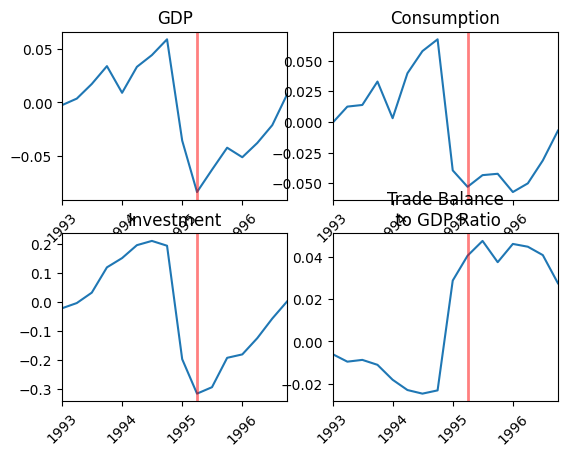

In [23]:
plt.clf()
fig = plt.figure()

ax = plt.subplot(221)
ax.plot(mexico['time'], mexico['GDP_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(mexico['time'], mexico['C_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(mexico['time'], mexico['I_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(mexico['time'], mexico['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()
    


In [ ]:
focus = mexico.copy()
focus['time'] = pd.to_datetime(focus['time'])
focus = focus.set_index('time')
early = pd.to_datetime('1994-07-01')
late = pd.to_datetime('1996-07-01')

focus
#dC = focus[early, 'C_cycle'] - focus[late, 'C_cycle']
#dGDP = focus[early, 'GDP_cycle'] - focus[late, 'GDP_cycle']




,country,Date,C,X,GDP,M,I,Q,Y,population,...,GDP_growth,I_growth,C_cycle,GDP_cycle,I_cycle,TBGDP_cycle,C_linear_cycle,GDP_linear_cycle,I_linear_cycle,TBGDP_linear_cycle
time,,,,,,,,,,,,,,,,,,,,,
1993-01-01,Mexico,Q1 1993,0.018036,0.004127,0.029042,0.004301,0.005988,1,1993,8.664845e+07,...,NaN,NaN,0.011252,0.009481,-0.009120,NaN,-0.038632,-0.013764,0.029239,NaN
1993-04-01,Mexico,Q2 1993,0.018123,0.004219,0.028981,0.004496,0.005982,2,1993,8.706197e+07,...,NaN,NaN,0.015125,0.006182,-0.000455,NaN,-0.036467,-0.017838,0.025908,NaN
1993-07-01,Mexico,Q3 1993,0.017994,0.004269,0.029138,0.004523,0.006083,3,1993,8.747747e+07,...,NaN,NaN,0.007080,0.010378,0.025993,NaN,-0.046211,-0.014410,0.040354,NaN
1993-10-01,Mexico,Q4 1993,0.018187,0.004430,0.029384,0.004756,0.006511,4,1993,8.789495e+07,...,NaN,NaN,0.016759,0.017535,0.103747,NaN,-0.038208,-0.008006,0.106095,NaN
1994-01-01,Mexico,Q1 1994,0.018187,0.004495,0.029543,0.005032,0.006852,1,1994,8.831442e+07,...,0.017081,0.134868,0.015795,0.021681,0.164523,NaN,-0.040804,-0.004581,0.154856,NaN
1994-04-01,Mexico,Q2 1994,0.018712,0.004467,0.030024,0.005158,0.007030,2,1994,8.872533e+07,...,0.035336,0.161549,0.043176,0.036524,0.199814,NaN,-0.014979,0.009600,0.178206,NaN
1994-07-01,Mexico,Q3 1994,0.018899,0.004547,0.030115,0.005292,0.007002,3,1994,8.913816e+07,...,0.032974,0.140786,0.051942,0.038151,0.205187,NaN,-0.007651,0.010665,0.171889,NaN
1994-10-01,Mexico,Q4 1994,0.018931,0.004693,0.030325,0.005396,0.006763,4,1994,8.955290e+07,...,0.031522,0.038010,0.052252,0.043502,0.179287,NaN,-0.008594,0.015617,0.134855,NaN
1995-01-01,Mexico,Q1 1995,0.017530,0.004955,0.028447,0.004134,0.004670,1,1995,8.996957e+07,...,-0.037791,-0.383373,-0.026287,-0.022239,-0.183185,-0.550156,-0.088101,-0.050270,-0.237768,NaN


In [ ]:
dc = 0.059687 + 0.050823
dY = 0.050936 + 0.081135
print(dc / dY)

0.8367469012879436


In [ ]:
dc = -0.033589 - 0.054780
dY =  -0.023305 - 0.040990
print(dc / dY)

1.3744303600591028


<Figure size 1280x960 with 0 Axes>

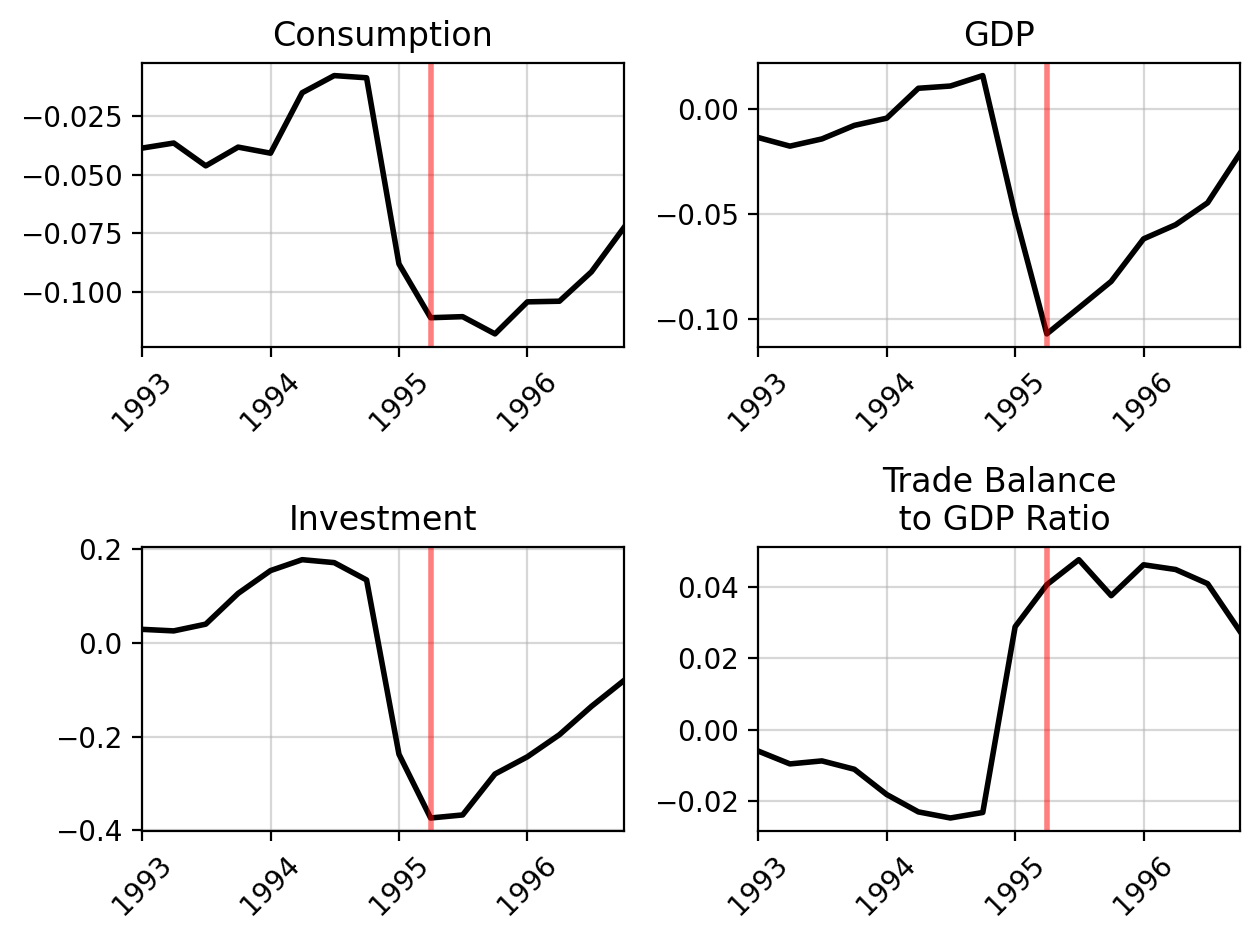

In [ ]:
plt.close()
plt.clf()
fig = plt.figure()

ax = plt.subplot(221)
ax.plot(mexico['time'], mexico['C_linear_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(mexico['time'], mexico['GDP_linear_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(mexico['time'], mexico['I_linear_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(mexico['time'], mexico['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

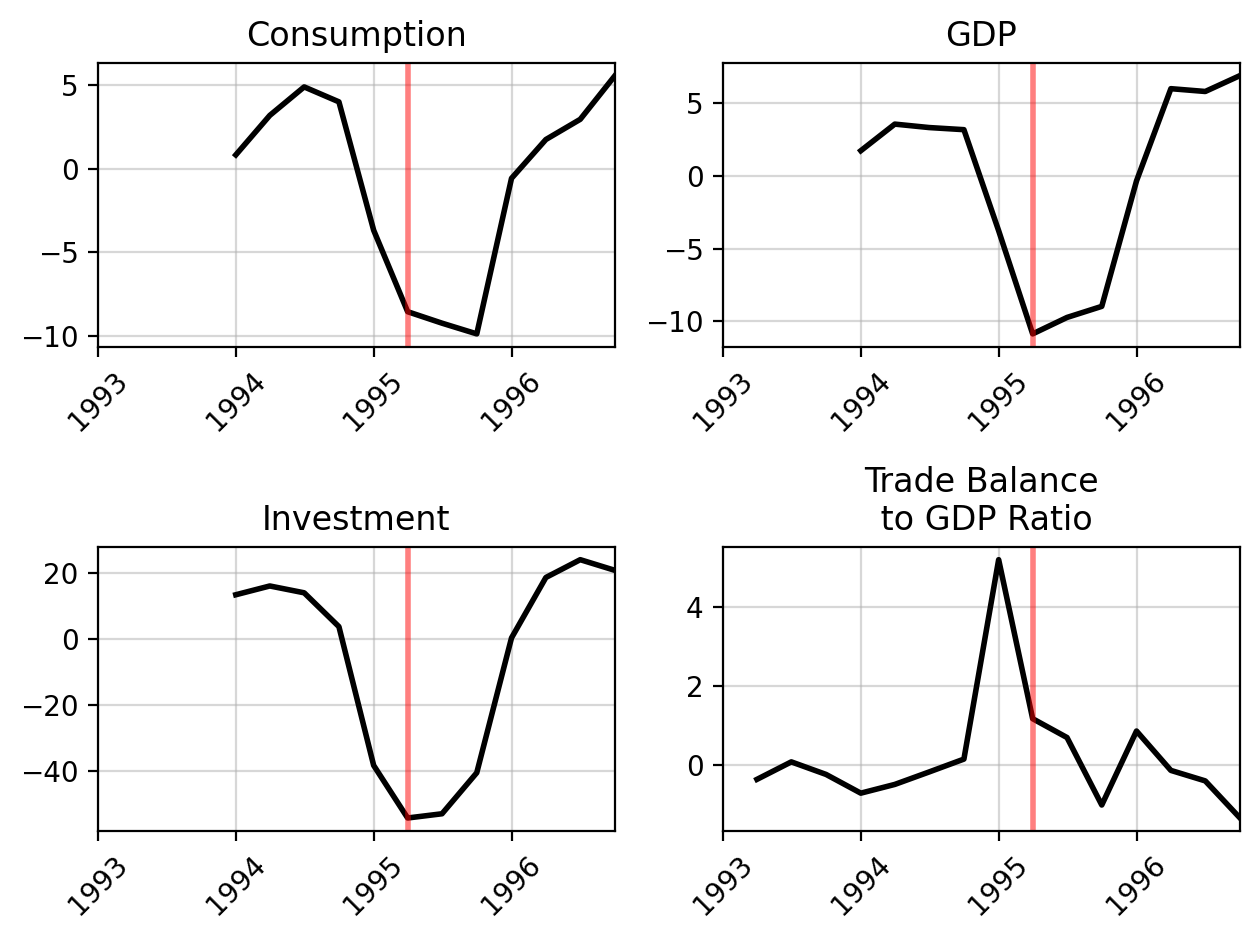

In [ ]:
fig = plt.figure()

ax = plt.subplot(221)
ax.plot(mexico['time'], 100*mexico['C_growth'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(mexico['time'], 100*mexico['GDP_growth'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(mexico['time'], 100*mexico['I_growth'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(mexico['time'], 100*mexico['TBGDP'].diff(1))
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

<Figure size 1280x960 with 0 Axes>

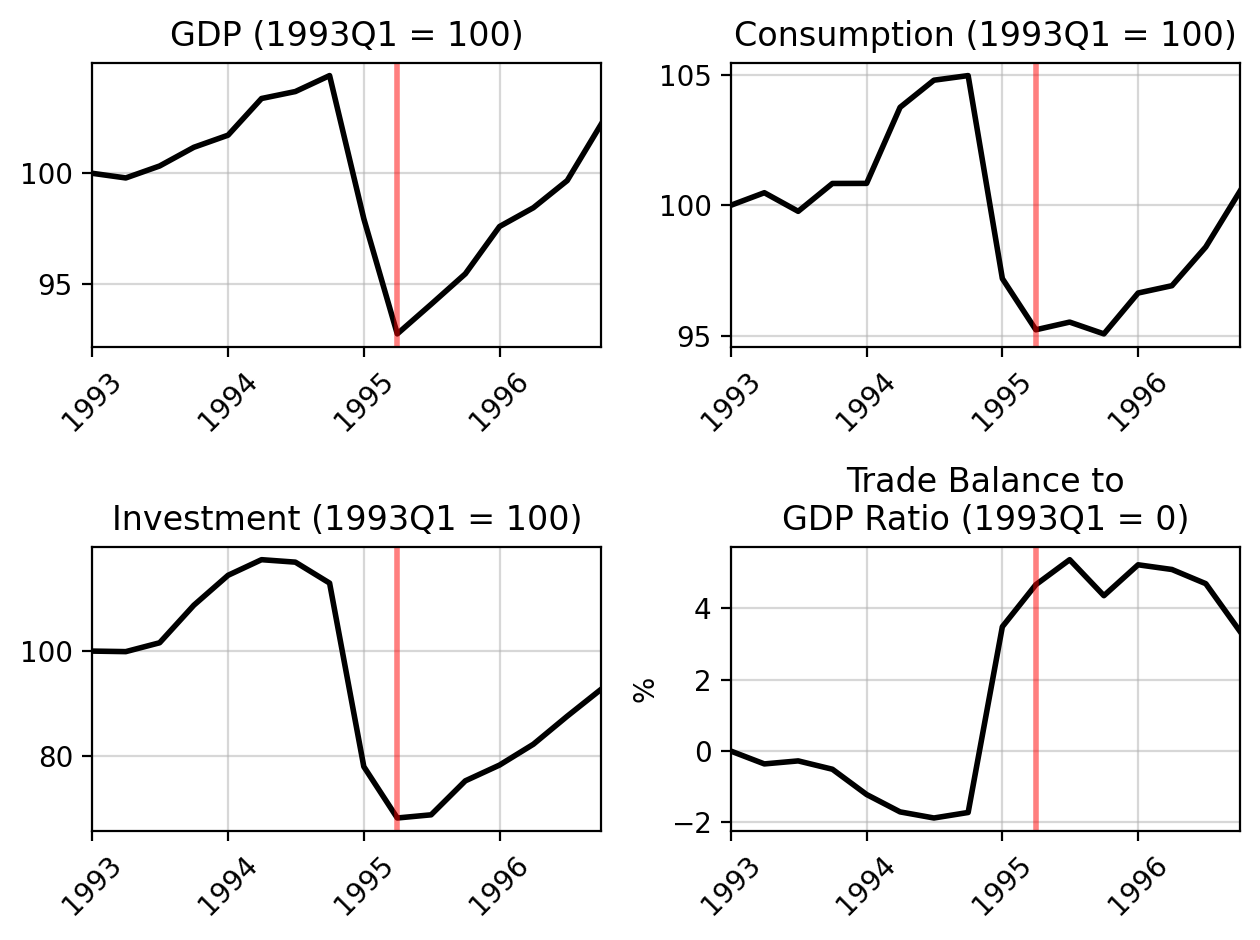

In [ ]:
from matplotlib.ticker import MaxNLocator


focus = data.copy().query("country == 'Mexico'").query('Y <= @ymax')
norm_period = pd.to_datetime('1993Q1')
focus= focus.set_index('time', drop=False)
normlabel = ' (1993Q1 = 100)'

plt.clf()
fig = plt.figure()

ax = fig.add_subplot(221)
ax.plot(focus['time'], 100 *focus['GDP'] / focus['GDP'][norm_period])
ax.set_title('GDP' + normlabel)
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)

ax = fig.add_subplot(222)
ax.plot(focus['time'], 100 *focus['C'] / focus['C'][norm_period])
ax.set_title('Consumption' + normlabel)
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)
#ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks(np.arange(95, 110, 5))

ax = fig.add_subplot(223)
ax.plot(focus['time'], 100 *focus['I'] / focus['I'][norm_period])
ax.set_title('Investment' + normlabel)
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)

ax = fig.add_subplot(224)
ax.plot(focus['time'], 100 *(focus['TBGDP'] - focus['TBGDP'][norm_period]))
ax.set_title('Trade Balance to\nGDP Ratio (1993Q1 = 0)')
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)
ax.set_ylabel('%')

plt.tight_layout()

In [ ]:
focus

,country,Date,C,X,GDP,M,I,Q,Y,time,...,GDP_growth,I_growth,C_cycle,GDP_cycle,I_cycle,TBGDP_cycle,C_linear_cycle,GDP_linear_cycle,I_linear_cycle,TBGDP_linear_cycle
time,,,,,,,,,,,,,,,,,,,,,
1993-01-01,Mexico,Q1 1993,0.018036,0.004127,0.029042,0.004301,0.005988,1,1993,1993-01-01,...,NaN,NaN,0.011252,0.009481,-0.009120,NaN,-0.038632,-0.013764,0.029239,NaN
1993-04-01,Mexico,Q2 1993,0.018123,0.004219,0.028981,0.004496,0.005982,2,1993,1993-04-01,...,NaN,NaN,0.015125,0.006182,-0.000455,NaN,-0.036467,-0.017838,0.025908,NaN
1993-07-01,Mexico,Q3 1993,0.017994,0.004269,0.029138,0.004523,0.006083,3,1993,1993-07-01,...,NaN,NaN,0.007080,0.010378,0.025993,NaN,-0.046211,-0.014410,0.040354,NaN
1993-10-01,Mexico,Q4 1993,0.018187,0.004430,0.029384,0.004756,0.006511,4,1993,1993-10-01,...,NaN,NaN,0.016759,0.017535,0.103747,NaN,-0.038208,-0.008006,0.106095,NaN
1994-01-01,Mexico,Q1 1994,0.018187,0.004495,0.029543,0.005032,0.006852,1,1994,1994-01-01,...,0.017081,0.134868,0.015795,0.021681,0.164523,NaN,-0.040804,-0.004581,0.154856,NaN
1994-04-01,Mexico,Q2 1994,0.018712,0.004467,0.030024,0.005158,0.007030,2,1994,1994-04-01,...,0.035336,0.161549,0.043176,0.036524,0.199814,NaN,-0.014979,0.009600,0.178206,NaN
1994-07-01,Mexico,Q3 1994,0.018899,0.004547,0.030115,0.005292,0.007002,3,1994,1994-07-01,...,0.032974,0.140786,0.051942,0.038151,0.205187,NaN,-0.007651,0.010665,0.171889,NaN
1994-10-01,Mexico,Q4 1994,0.018931,0.004693,0.030325,0.005396,0.006763,4,1994,1994-10-01,...,0.031522,0.038010,0.052252,0.043502,0.179287,NaN,-0.008594,0.015617,0.134855,NaN
1995-01-01,Mexico,Q1 1995,0.017530,0.004955,0.028447,0.004134,0.004670,1,1995,1995-01-01,...,-0.037791,-0.383373,-0.026287,-0.022239,-0.183185,-0.550156,-0.088101,-0.050270,-0.237768,NaN


In [ ]:
peak = pd.to_datetime('1994-10-01')
trough = pd.to_datetime('1995-04-01')

pC = (focus.loc[trough, 'C'] - focus.loc[peak, 'C']) / focus.loc[peak, 'C']
pGDP = (focus.loc[trough, 'GDP'] - focus.loc[peak, 'GDP']) / focus.loc[peak, 'GDP']
pI = (focus.loc[trough, 'I'] - focus.loc[peak, 'I']) / focus.loc[peak, 'I']
pTBGDP = (focus.loc[trough, 'TBGDP'] - focus.loc[peak, 'TBGDP']) 

print(pC)
print(pGDP)
print(pI)
print(pTBGDP)

-0.09266208123200793
-0.11176660060838499
-0.39614442155183743
0.06383999109231048


In [ ]:
peak = pd.to_datetime('1994-10-01')
trough = pd.to_datetime('1995-04-01')

pC = (focus.loc[trough, 'C_cycle'] - focus.loc[peak, 'C_cycle']) 
pGDP = (focus.loc[trough, 'GDP_cycle'] - focus.loc[peak, 'GDP_cycle']) 
pI = (focus.loc[trough, 'I_cycle'] - focus.loc[peak, 'I_cycle']) 


print(pC)
print(pGDP)
print(pI)

-0.10097959548509827
-0.12254154476275358
-0.4902748558677299


In [ ]:
print(focus.loc[peak, 'TBGDP'])
print(focus.loc[trough, 'TBGDP'])

-0.023194228817373652
0.04064576227493683


In [ ]:
peak = pd.to_datetime('1994-10-01')
trough = pd.to_datetime('1996-10-01')

pC = (focus.loc[trough, 'C'] - focus.loc[peak, 'C']) / focus.loc[peak, 'C']
pGDP = (focus.loc[trough, 'GDP'] - focus.loc[peak, 'GDP']) / focus.loc[peak, 'GDP']
pI = (focus.loc[trough, 'I'] - focus.loc[peak, 'I']) / focus.loc[peak, 'I']
pTBGDP = (focus.loc[trough, 'TBGDP'] - focus.loc[peak, 'TBGDP']) 

print(pC)
print(pGDP)
print(pI)
print(pTBGDP)

-0.04212922570876675
-0.02083119823974286
-0.17862778642671173
0.05074931456010895
